In [91]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

### Get latest data from nytimes:

In [92]:
df_counties = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df_states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [93]:
df_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [94]:
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [95]:
df_states.date = pd.to_datetime(df_states.date)
df_counties.date = pd.to_datetime(df_counties.date)

In [96]:
df2 = df_states.pivot(index='date', columns='state', values='deaths').reset_index()

In [97]:
df3.head()

state,California,Colorado,Connecticut,Florida,Georgia,Illinois,Indiana,Louisiana,Massachusetts,Michigan,Nevada,New Jersey,New York,Ohio,Oregon,Pennsylvania,Texas,Virginia,Washington
days,,,,,,,,,,,,,,,,,,,
0,11.0,10.0,10.0,9.0,10.0,9.0,12.0,10.0,11.0,9.0,10.0,9.0,10.0,11.0,10.0,11.0,11.0,9.0,10.0
1,14.0,11.0,12.0,11.0,14.0,12.0,14.0,10.0,15.0,16.0,10.0,11.0,17.0,15.0,11.0,16.0,12.0,14.0,11.0
2,17.0,19.0,19.0,13.0,20.0,16.0,18.0,16.0,25.0,24.0,10.0,16.0,27.0,22.0,12.0,23.0,21.0,14.0,11.0
3,19.0,24.0,21.0,18.0,25.0,21.0,26.0,20.0,35.0,43.0,NaN,20.0,30.0,NaN,NaN,NaN,23.0,NaN,12.0
4,24.0,31.0,27.0,19.0,25.0,26.0,NaN,34.0,NaN,63.0,NaN,27.0,57.0,NaN,NaN,NaN,NaN,NaN,16.0


In [98]:
df3 = df2.copy().drop(columns=['date'])
for state in df2.columns[1:]:
    #print(state)
    try:
        #chose 9 days b/c with threshold of exactly 10, Michigan has an odd start position
        start_date = df3[df3[state] >= 9].index[0]
        df3[state] = df3[state].shift(-start_date)
    except:
        start_date = 0
        #print("not yet >10; skipping ")
        df3 = df3.drop(state, axis=1)
df3.index.name = 'days'
# drop if less than three datapoints:
df3 = df3[[col for col in df3.columns if df3[col].count() > 2]]

In [99]:
df3 = df3.dropna(how='all')
plot_df = df3.reset_index().melt(id_vars='days')
plot_df

,days,state,value
0,0,California,11.0
1,1,California,14.0
2,2,California,17.0
3,3,California,19.0
4,4,California,24.0
...,...,...,...
470,20,Washington,110.0
471,21,Washington,123.0
472,22,Washington,130.0
473,23,Washington,151.0


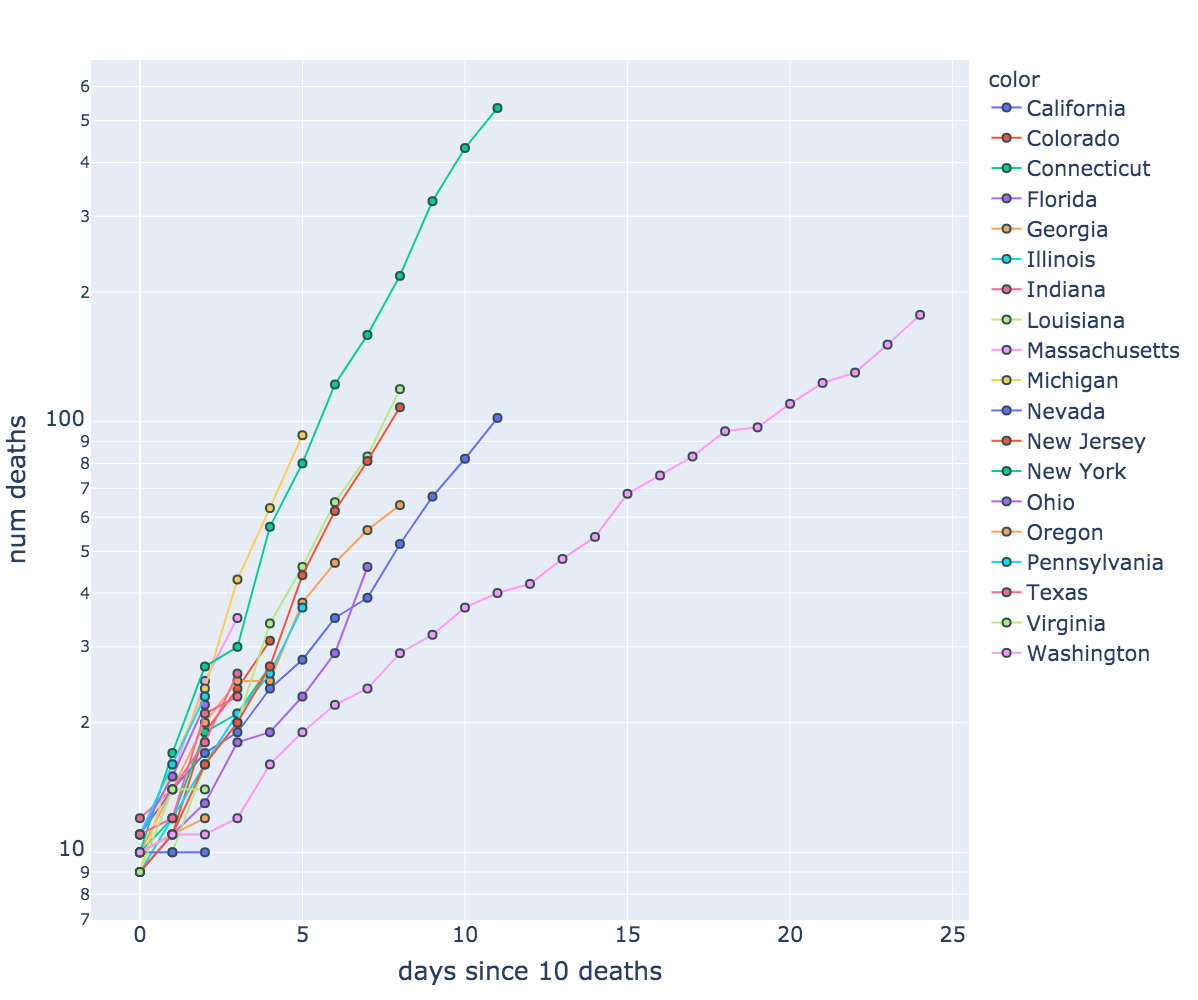

In [100]:
plt = px.scatter(x=plot_df.days, y=plot_df.value, color=plot_df.state,
              width=1200, height=1000, 
              log_y=True,
              labels=dict(y='num deaths', x='days since 10 deaths')
            )

plt.update_traces(mode='lines+markers',
                  marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
plt.update_layout(font=dict(
        size=21))
plt.show()

In [101]:
#repeat for counties:
df_counties['countystate'] = df_counties.county + ', ' +  df_counties.state
df_c2 =df_counties.drop(columns='state').pivot(index='date', columns='countystate', values='deaths').reset_index()
df_c3 = df_c2.copy().drop(columns=['date'])

#drop unknown data because the aggregation isn't helpful
df_c3 = df_c3[[col for col in df_c3.columns if 'Unknown' not in col and df_c3[col].count() > 2]]
# drop if less than three datapoints:
df_c3 = df_c3[[col for col in df_c3.columns if df_c3[col].count() > 2]]

In [102]:
for countystate in df_c3.columns[1:]:
    try:
        #chose 9 days b/c with threshold of exactly 10, Michigan has an odd start position
        start_date = df_c3[df_c3[countystate] >= 9].index[0]
        df_c3[countystate] = df_c3[countystate].shift(-start_date)
    except:
        start_date = 0
        #print("not yet >10; skipping ")
        df_c3 = df_c3.drop(countystate, axis=1)
df_c3.index.name = 'days'

In [103]:
#get rid of zeros
df_c3 = df_c3.replace(0, np.nan)
df_c3 = df_c3.dropna(how='all')

In [104]:
plot_df_c = df_c3.reset_index().melt(id_vars='days')
plot_df_c

,days,countystate,value
0,0,"Abbeville, South Carolina",NaN
1,1,"Abbeville, South Carolina",NaN
2,2,"Abbeville, South Carolina",NaN
3,3,"Abbeville, South Carolina",NaN
4,4,"Abbeville, South Carolina",NaN
...,...,...,...
645,20,"Westchester, New York",NaN
646,21,"Westchester, New York",NaN
647,22,"Westchester, New York",NaN
648,23,"Westchester, New York",NaN


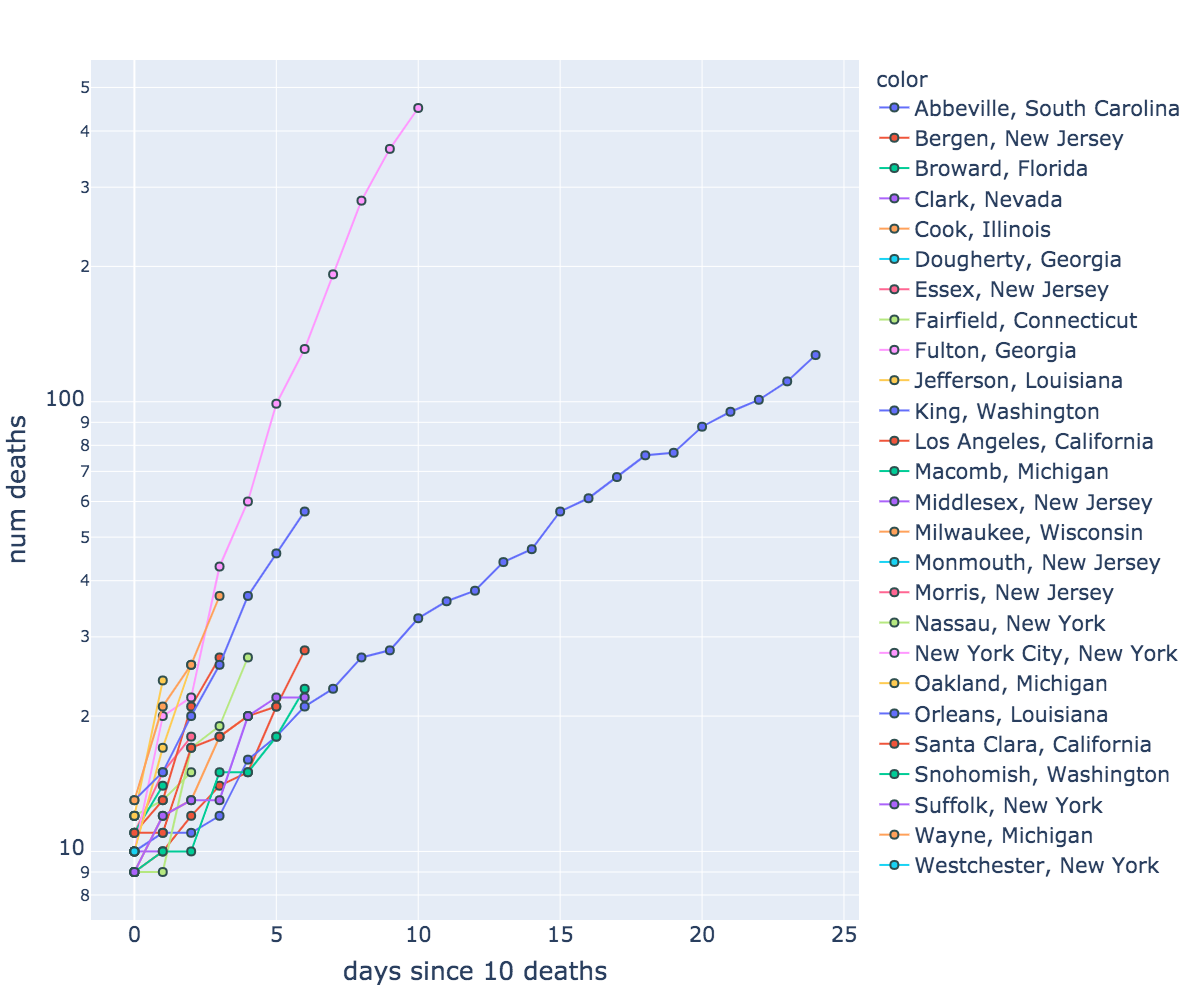

In [105]:
plt2 = px.scatter(x=plot_df_c.days, y=plot_df_c.value, color=plot_df_c.countystate,
              width=1200, height=1000, 
              log_y=True,
              labels=dict(y='num deaths', x='days since 10 deaths')
            )

plt2.update_traces(mode='lines+markers',
                  marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
plt2.update_layout(font=dict(
        size=21))
plt2.show()